<a href="https://colab.research.google.com/github/saishshinde15/TensorFlow/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [6]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<ipython-input-11-9d3fd451b567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

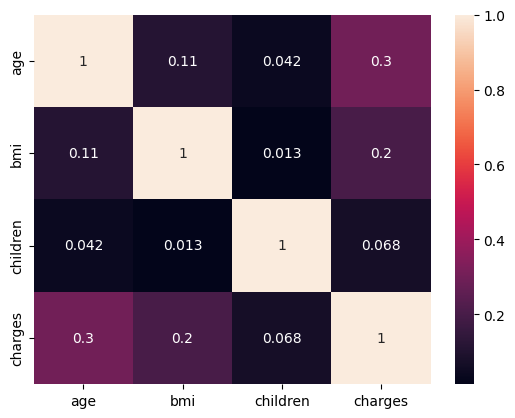

In [11]:
sns.heatmap(dataset.corr(),annot=True)

In [12]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='sex', ylabel='count'>

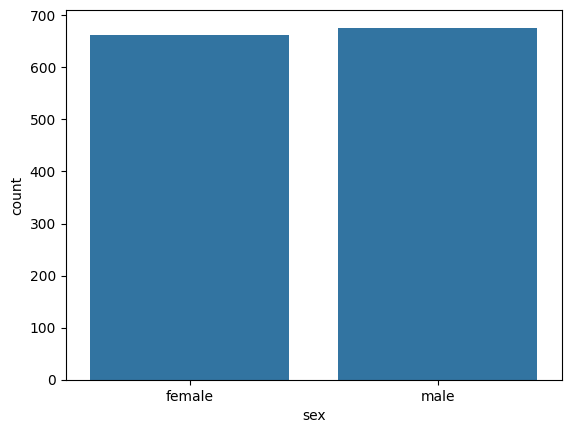

In [13]:
sns.countplot(data=dataset,x='sex')

<Axes: xlabel='smoker', ylabel='count'>

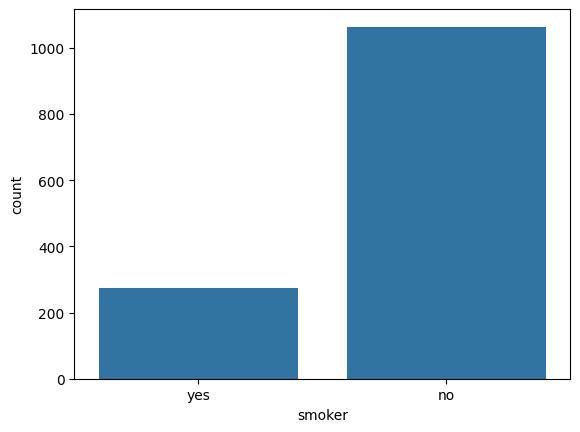

In [14]:
sns.countplot(data=dataset,x='smoker')

<Axes: xlabel='region', ylabel='count'>

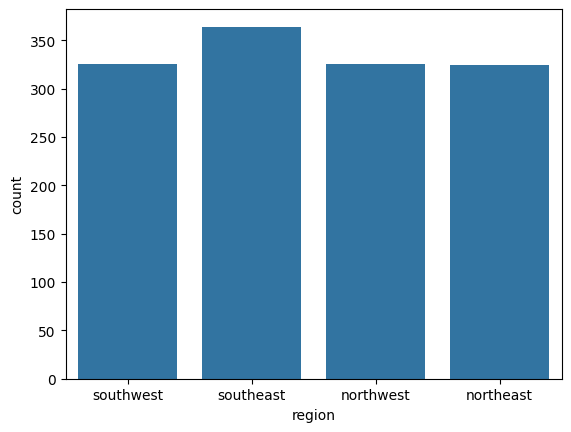

In [15]:
sns.countplot(data=dataset,x='region')

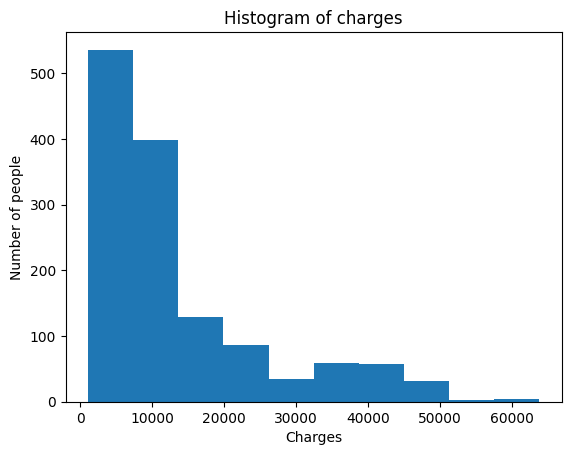

In [16]:
# histogram of charges
plt.hist(dataset['charges'], bins=10)
plt.xlabel('Charges')
plt.ylabel('Number of people')
plt.title('Histogram of charges')
plt.show()





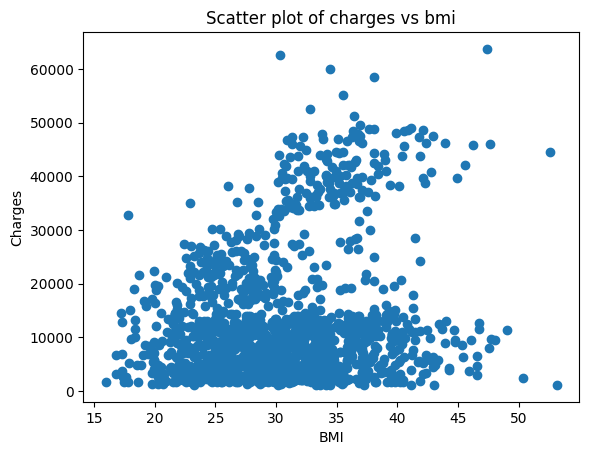

In [17]:
# scatter plot of charges vs bmi
plt.scatter(dataset['bmi'], dataset['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter plot of charges vs bmi')
plt.show()

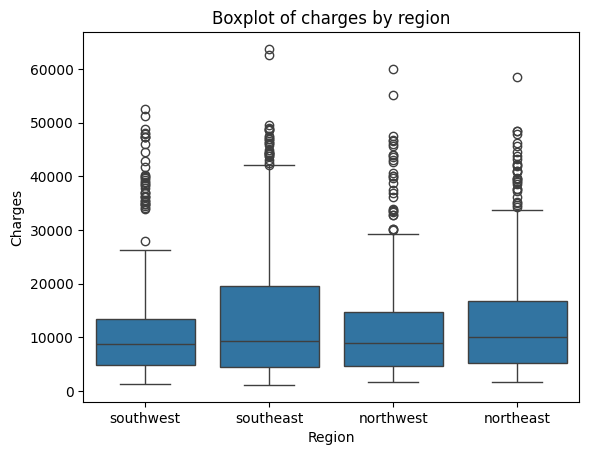

In [18]:
# boxplot of charges by region
sns.boxplot(x='region', y='charges', data=dataset)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Boxplot of charges by region')
plt.show()


In [19]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
X=dataset.iloc[:,0:6].values

In [21]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [22]:
y=dataset.iloc[:,-1].values

In [23]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1]) #with respect to X

In [25]:
X

array([[19, 0, 27.9, 0, 'yes', 'southwest'],
       [18, 1, 33.77, 1, 'no', 'southeast'],
       [28, 1, 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 0, 36.85, 0, 'no', 'southeast'],
       [21, 0, 25.8, 0, 'no', 'southwest'],
       [61, 0, 29.07, 0, 'yes', 'northwest']], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 4] = le.fit_transform(X[:, 4]) #with respect to X

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 5] = le.fit_transform(X[:, 5]) #with respect to X

In [28]:
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
ann1=tf.keras.models.Sequential()

In [60]:
ann1.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [61]:
ann1.add(tf.keras.layers.Dense(units=10,activation='relu'))

In [62]:
ann1.add(tf.keras.layers.Dense(units=1,activation='relu'))

In [63]:
ann1.compile(optimizer='adam', loss='mae', metrics=['mae'])


In [35]:
#solving error not always needed

X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

<ipython-input-35-f4eb01f48d58>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.asarray(X_train).astype(np.int)
<ipython-input-35-f4eb01f48d58>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

In [64]:
history=ann1.fit(X_train,y_train,batch_size=32,epochs=100) ## storing in history variable for ploting reason

Epoch 1/100
34/34 [==============================] - 4s 52ms/step - loss: 13205.5029 - mae: 13205.5029
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13152.9434 - mae: 13152.9434
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13050.7285 - mae: 13050.7285
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12858.8242 - mae: 12858.8242
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12528.1367 - mae: 12528.1367
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12006.3271 - mae: 12006.3271
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11258.1934 - mae: 11258.1934
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 10319.3369 - mae: 10319.3369
Epoch 9/100
34/34 [==============================] - 2s 48ms/step - loss: 9305.5420 - mae: 9305.5420
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 8399.400

In [37]:
X_test=np.asarray(X_test).astype(np.int)

y_test=np.asarray(y_test).astype(np.int)

<ipython-input-37-d8d9b9f3dc8a>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test=np.asarray(X_test).astype(np.int)
<ipython-input-37-d8d9b9f3dc8a>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20;

In [65]:
model_1_eval=ann1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 6317.7427 - mae: 6317.7427


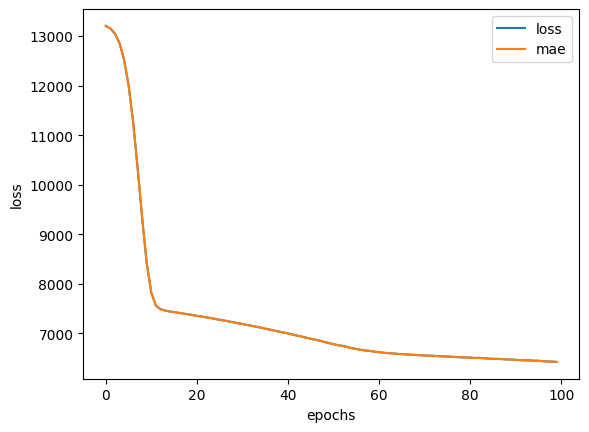

In [66]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [40]:
## lets make one more model as this one is not good

In [41]:
ann2=tf.keras.models.Sequential()

In [42]:
ann2.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [43]:
ann2.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [44]:
ann2.add(tf.keras.layers.Dense(units=1,activation='relu'))

In [45]:
ann2.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [46]:
history2=ann2.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13193.2666 - mae: 13193.2666
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13051.9824 - mae: 13051.9824
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12629.3076 - mae: 12629.3076
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11640.6504 - mae: 11640.6504
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 9998.8604 - mae: 9998.8604
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 8312.8125 - mae: 8312.8125
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7602.7012 - mae: 7602.7012
Epoch 8/100
34/34 [==============================] - 6s 4ms/step - loss: 7511.4404 - mae: 7511.4404
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7483.1694 - mae: 7483.1694
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7456.5337 - mae: 7

In [47]:
model_2_eval=ann2.evaluate(X_test,y_test)

9/9 [==============================] - 1s 108ms/step - loss: 5575.0356 - mae: 5575.0356


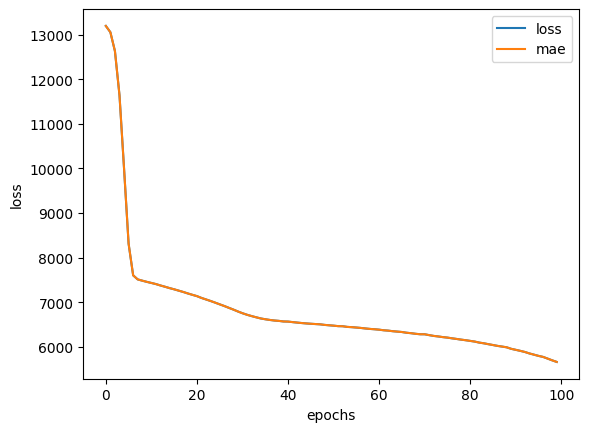

In [48]:
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [67]:
model_results = [["model_1", model_1_eval],
                 ["model_2", model_2_eval]]

In [68]:
model_results

[['model_1', [6317.74267578125, 6317.74267578125]],
 ['model_2', [5575.03564453125, 5575.03564453125]]]

In [51]:
## this shows that model 2 performed better than model 1

In [52]:
## lets create a third model similar to model 2 but increase epochs to 200

In [69]:
ann3=tf.keras.models.Sequential()

In [70]:
ann3.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [71]:
ann3.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [72]:
ann3.add(tf.keras.layers.Dense(units=1,activation='relu'))

In [73]:
ann3.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [74]:
history3=ann3.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
34/34 [==============================] - 4s 3ms/step - loss: 13194.9590 - mae: 13194.9590
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13036.3311 - mae: 13036.3311
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12537.5713 - mae: 12537.5713
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 11342.8027 - mae: 11342.8027
Epoch 5/200
34/34 [==============================] - 2s 48ms/step - loss: 9375.2715 - mae: 9375.2715
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7779.6997 - mae: 7779.6997
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 7460.7744 - mae: 7460.7744
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7433.6606 - mae: 7433.6606
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7408.1250 - mae: 7408.1250
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7379.4463 - mae: 

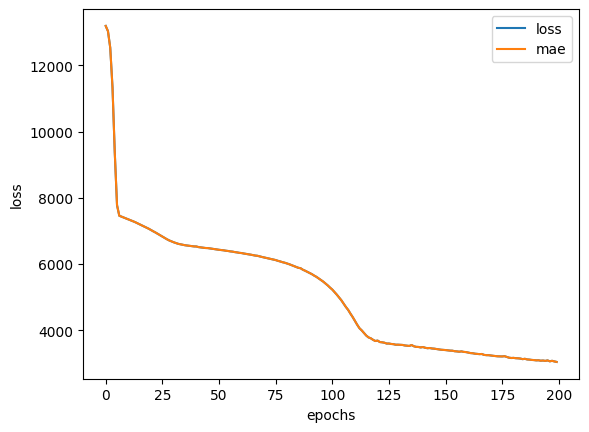

In [79]:
pd.DataFrame(history3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [75]:
model_3_eval=ann3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2976.6777 - mae: 2976.6777


In [76]:
model_results = [["model_1", model_1_eval],
                 ["model_2", model_2_eval],
                 ["model_3", model_3_eval]]

In [77]:
model_results

[['model_1', [6317.74267578125, 6317.74267578125]],
 ['model_2', [5575.03564453125, 5575.03564453125]],
 ['model_3', [2976.677734375, 2976.677734375]]]

In [78]:
## we can conclude that model 3 performed the best
